**Created on**: 2021.09.04

**Implemented by**:Anthony Cho

**Subject**: Quadratic programming: Markovitz portfolio

### Model: Markovitz portfolio

$$\min \mathbf{x}'V \mathbf{x}$$

s.t. $$\sum x_i = 1,$$ $$\sum \mu_{i}x_{i} \geq r, $$ $$\mathbf{x}\geq 0.$$

where $\mathbf{\mu}$ is the mean returns vector of assets vector, $V$ is the covariance matrix of return assets, $\mathbf{x}$ is the decision variables vector that decide the percentage to invest to each asset.

In [1]:
## Libraries dependencies
import gurobipy as gp

from numpy.random import randn, seed
from numpy import sqrt, linspace, array
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [2]:
## random seed
seed(123)

## Number of assets
n_assets = 4

## Number of historical record
n_samples = 1000

## Asset return vector
returns = randn(n_samples, n_assets)

## Name of assets
names = ['A{}'.format(tag) for tag in range(n_assets)]

## Convert to a dataframe
returns = DataFrame(returns, columns=names)

In [4]:
returns

,A0,A1,A2,A3
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186
...,...,...,...,...
995,-0.499897,0.587647,-0.926542,1.736982
996,-0.459550,0.125822,-1.119947,-0.521887
997,-2.013430,-0.028708,-0.103142,-1.761313
998,-0.185167,0.504077,1.354567,-0.907952


In [5]:
## Data pre-processing

## Vector of mean returns
mu = returns.mean()

## Vector of variace of returns
muVar = returns.var()

## Covariance matriz of returns
sigma = returns.cov()

In [6]:
print(mu)
print(muVar)
print(sigma)

A0   -0.007502
A1    0.039160
A2   -0.010286
A3    0.024285
dtype: float64
A0    0.954577
A1    0.947671
A2    1.024609
A3    0.941717
dtype: float64
          A0        A1        A2        A3
A0  0.954577  0.004155  0.046308 -0.033297
A1  0.004155  0.947671  0.002206 -0.067590
A2  0.046308  0.002206  1.024609  0.063885
A3 -0.033297 -0.067590  0.063885  0.941717


### Model

In [7]:
## Model instance
model = gp.Model('Markovitz Portfolio')

## Decision variables building
variables = []
for tag in names:
    variables.append( model.addVar(lb=0, vtype=gp.GRB.CONTINUOUS, name=tag) )
variables = Series(variables, index=names)

## Objective function building (portfolio risk)
portfolio_risk = sigma.dot(variables).dot(variables)

## Objective function and model sense assignment
model.setObjective(portfolio_risk, gp.GRB.MINIMIZE)

## Constraint building
model.addConstr(variables.sum(), gp.GRB.EQUAL, 1, name='budget')

## setting: no report
# model.setParam('OutputFlag', 0)

## Model update
model.update()

Academic license - for non-commercial use only - expires 2021-10-22
Using license file /home/hp/gurobi.lic


In [8]:
## Model display
model.display()

Minimize
   <gurobi.QuadExpr: 0.0 + [ 0.9545765251782782 A0 ^ 2 + 0.008309645917993805 A0 * A1 + 0.09261570668374033 A0 * A2 + -0.06659386259971627 A0 * A3 + 0.9476710292839416 A1 ^ 2 + 0.004411722374403845 A1 * A2 + -0.13517979916133885 A1 * A3 + 1.0246089508970868 A2 ^ 2 + 0.1277700683688123 A2 * A3 + 0.9417169329442143 A3 ^ 2 ]>
Subject To
   budget : <gurobi.LinExpr: A0 + A1 + A2 + A3> = 1.0


In [9]:
## Optimize the model
model.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 4 columns and 4 nonzeros
Model fingerprint: 0xa9438a10
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [9e-03, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 1 rows, 4 columns, 4 nonzeros
Presolved model has 10 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 3
 AA' NZ     : 6.000e+00
 Factor NZ  : 1.000e+01
 Factor Ops : 3.000e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.36579967e+05 -2.36579967e+05  3.50e+03 8.45e-07  1.00e+06     0s
   1   9.59041809e+03 -1.06912645e+04  9.29e+01 2.24e-08

In [10]:
## Valor optimo del modelo
minimumRisk = model.ObjVal
print('Minimum risk of the optimal portfolio: {:.6f}'.format(minimumRisk))
print('Minimum volatility of the optimal portfolio: {:.6f}'.format(sqrt(minimumRisk)))

Minimum risk of the optimal portfolio: 0.241134
Minimum volatility of the optimal portfolio: 0.491054


In [11]:
## Let's compute the profitability of the optimal portfolio
rMin = 0
for i in range(len(variables)):
    rMin += mu[i] * variables[i].x

print("The profitability of the optimal portfolio: {:.10f}".format(rMin))


The profitability of the optimal portfolio: 0.0132190687


In [12]:
variables

A0    <gurobi.Var A0 (value 0.2508371204076176)>
A1    <gurobi.Var A1 (value 0.2721575957606374)>
A2    <gurobi.Var A2 (value 0.2065573257098918)>
A3    <gurobi.Var A3 (value 0.2704479581218536)>
dtype: object

### Efficient frontier building

In [14]:
Status = {1: 'Loaded',
          2: 'Optimal', 
          3: 'Infeasible', 
          4: 'Infeasible or unbounded', 
          5: 'Unbounded'}

## Variable storage of output for each scenario varying minimal return in the model
scenarios = []
rScenarios = []
sigmaScenarios = []

## Minimal profitability (minimal total return of invested assets) constraint building
portfolioProfitability = mu.dot(variables)

## Let's add the minimal profitability to the model
target = model.addConstr(portfolioProfitability, gp.GRB.GREATER_EQUAL, 0, name='minimum profitability')

model.setParam('OutputFlag', 0)

## Model update
model.update()

for r in linspace(rMin, 5*rMin, 100):
    
    ## Assign the minimum profitability value to the model
    target.RHS = r
    
    ## Model update
    model.update()
    
    ## Clear all results stored in the model
    model.reset()
    
    ## Optimize the updated model
    model.optimize()
    
    ## Store the output from the optimal model
    if model.Status == gp.GRB.OPTIMAL:
        scenarios.append([var.x for var in variables])
        rScenarios.append(r)
        sigmaScenarios.append(model.ObjVal)
    else:
        print('{}: r={}'.format(Status[model.Status], r))

Infeasible or unbounded: r=0.03939015408062961
Infeasible or unbounded: r=0.03992425786477374
Infeasible or unbounded: r=0.040458361648917876
Infeasible or unbounded: r=0.04099246543306201
Infeasible or unbounded: r=0.041526569217206134
Infeasible or unbounded: r=0.04206067300135027
Infeasible or unbounded: r=0.04259477678549439
Infeasible or unbounded: r=0.043128880569638525
Infeasible or unbounded: r=0.04366298435378266
Infeasible or unbounded: r=0.04419708813792679
Infeasible or unbounded: r=0.04473119192207092
Infeasible or unbounded: r=0.04526529570621504
Infeasible or unbounded: r=0.045799399490359174
Infeasible or unbounded: r=0.04633350327450331
Infeasible or unbounded: r=0.04686760705864744
Infeasible or unbounded: r=0.04740171084279157
Infeasible or unbounded: r=0.047935814626935705
Infeasible or unbounded: r=0.048469918411079824
Infeasible or unbounded: r=0.049004022195223956
Infeasible or unbounded: r=0.04953812597936809
Infeasible or unbounded: r=0.05007222976351222
Infeas

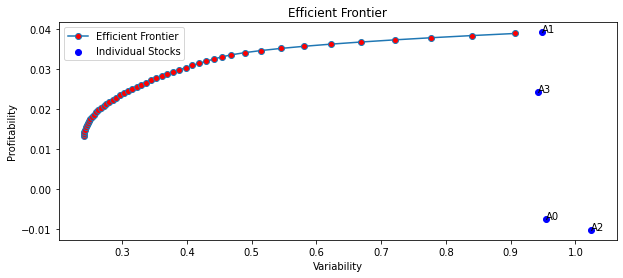

In [15]:
## Plot efficient frontier
plt.figure(figsize=(10, 4))
plt.plot(sigmaScenarios, rScenarios, marker='o', markerfacecolor='r', label='Efficient Frontier')
plt.scatter(x=muVar, y=mu,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(names):
    plt.annotate(stock, (muVar[i], mu[i]))
plt.xlabel('Variability')
plt.ylabel('Profitability') 
plt.title('Efficient Frontier')
plt.legend()
plt.show()


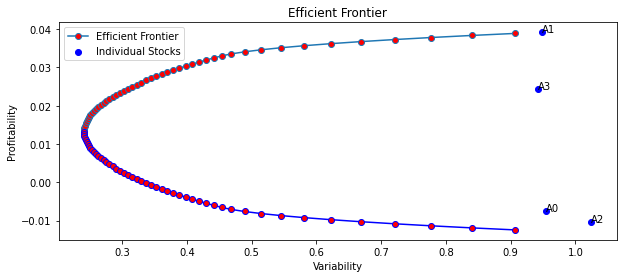

In [17]:
## Plot efficient frontier
plt.figure(figsize=(10, 4))
plt.xlabel('Variability'); 
plt.ylabel('Profitability'); 
plt.title('Efficient Frontier')
plt.plot(sigmaScenarios, rScenarios, marker='o', markerfacecolor='r', label='Efficient Frontier')
plt.plot(sigmaScenarios, -array(rScenarios)+2*rMin, color='b', marker='o', markerfacecolor='r')
plt.scatter(x=muVar, y=mu,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(names):
    plt.annotate(stock, (muVar[i], mu[i]))

plt.legend()
plt.show()
